<font size='5'>
AE 543 Structural Dynamics
<br>
<font size="5">Case 01: Modeling T-33 Wing Vibrations </b></font>
<br>
<font size="3"> Released date: 10/25/2025</font>
<br>
<font size="3"> Due date: 11/07/2025 at 11:59 PM</font>
</center>
<br>
<br>
<font size="3"> 

<b> The case study assignment has three primary learning objectives:</b>

* Connecting solid mechanics to vibration fundamentals: This will involve determining the structural stiffness of a simplified wing structure using its geometric and material properties.

* Conducting Systematic structural vibration Analysis: The assignment will guide you through the typical procedure used in structural vibration analysis. You will gain an understanding of the importance of mathematically idealizing complex systems into simplified single-degree-of-freedom (SDoF) and multi-degree-of-freedom (MDoF) models prior to employing advanced finite element method (FEM) tools.

* Realizing the advantages of energy methods over Newtonian mechanics: You will use both Lagrangian and Newtonian mechanics to derive the equations of motion for a wing strucutre as an MDoF system. This will deepen your appreciation of Lagrangian analytical power and versatility.

<b> Why Use Jupyter Notebook? </b>
<br>
Jupyter Notebook serves as both a coding and reporting platform, enabling a seamless combination of computation, documentation, and visualization. It encourages clear commentary and explanation of your code in a structured, report-like format.

<b>Expectations:</b>
<br>
The project will be submitted as a Jupyter Notebook product. Throughout your notebook, briefly describe your approach, explain the underlying physics of your results. Your submission should reflect both sound technical reasoning and clarity in presentation. Figures without proparly lable axes, grids, title and legends will not be accepted. You will recieve 25 points for completing the assignment tasks on time. You will recieve an extra point for each figure from your model beyond the assignment requirment upto five points. However, you must explain the why you provided the figure with interpretation of your engineering findings.    

<b> Background: </b>
<br>
The wing of a typical fighter jet, such as the Lockheed T-33 Shooting Star or T-Bird, consists of a lightweight structural airframe with attachment mechanisims at the tip for carrying a mission-related payload or an additional fuel tank attached to the wing tip, denoted as $m_p$. In this case study, you will perform a dynamic analysis of this aircraft wing using various idealized lumped-parameter modeling approaches.

<img src="Images/Approach0.png" alt="Alt text" width="400"/>

For modeling purposes, the wing may be reasonably approximated as a cantilevered closed-rectagular-cell beam (hollow beam) with a concentrated tip mass. In some tasks you will be asked to assume that the distributed structural mass of the beam, $m_w$ is negligible relative to the tip mass, which is given as $m_p$ = 100 kg. Each wing extends 5.0 m from the fuselage.

Idealizing the airfoil closed-rectagular-cell, assume the chord and height remain constant along the span, with values of 0.70 m and 0.25 m, respectively. Accordingly, the beam’s external cross-sectional area is 0.70 × 0.25 m $^2$. A uniform wall thickness of 0.010 m is assumed for the box-beam structure. The wing is fabricated from aluminum alloy 6061-T6. For the purposes of this assignment, the following material properties for aluminum 6061-T6 are obtained from matweb.com: Young’s modulus, $E$=69 GPa, density $\rho$=2700 kg/m $^2$, and Poisson’s ratio $\nu$=0.33.

<b> Approach 0.1: Preliminary analysis</b> (3 points)
<br>

* a) Estimate the effective tip displacements and stiffness due to vertical, $F_z$, axial, $𝐹_𝑥$, and tortional, $𝐹_{\theta}$, loads at the tip. Assume the loads are static and $m_w$ is negligible.
* b) Estimate the effective tip displacements and stiffness due to vertical, $𝐹_𝑧$, axial, $𝐹_𝑥$, and tortional, $𝐹_{\theta}$, loads at the tip. Assume the loads are static and $m_w$ is inegligible.
* c) Estimate the undamped natural frequencies for extension, bending and torsion of this idealized wing using the information provided above with and without $m_w$. Provide units in Hz and rad/s. Can $w_w$ neglected? 

Complete the above tasks under this section. 

In [8]:
import numpy as np
import math as m
#=============================================================#
#            Input Parameters
#============================================================#
m_p =100          # Mass of the plane [kg]
L = 5               # Length of the wing [m]
b = 0.7            # Chord of the airfoil wing [m]
h = 0.25           # Height of the airfoil wing [m]
t = 0.01           # Thickness of the wing [m]
E = 69e9           # Modulus of Elasticity [Pa] 
rho = 2700        # Density of the wing material [kg/m^3]
nu = 0.33         # Poisson's Ratio
#=============================================================#
#            Computing Section Properties
#============================================================#
def Ixx(b, t): # Second Moment of Area about the x-axis
    b_inner = b - 2*t
    h_inner = h -2*t
    return ((b * h**3) - (b_inner * h_inner**3)) / 12 #m^4
def A(b, t):# Area of the cross-section
    b_inner = b - 2*t
    h_inner = h -2*t
    return (b * h ) - (b_inner * h_inner) #m^2

def J(b, t): # Polar Moment of Inertia
    b_inner = b - 2*t
    h_inner = h -2*t
    J_outer = (b**4 + h**4 ) / 12
    J_inner = (b_inner**4 + h_inner**4) / 12
    return J_outer - J_inner #m^4
def G(E, nu): # Shear Modulus
    return E / (2 * (1 + nu))  # Pa

# Calculate tip displacements and stiffnesses
Kz = 3*E*Ixx(b,t) / L**3  # Vertical stiffness [N/m]
Kx = E*A(b,t) / L        # Axial stiffness [N/m]
Ktheta = G(E,nu)*J(b,t) / L  # Torsional stiffness [Nm/rad]


#=============================================================#
#            Output Section Properties
#============================================================#
Kz, Kx, Ktheta
#=============================================================#

(367623.72, 256680000.0000001, 11843305.2631579)

In [9]:
import numpy as np

"""
Calculates the effective tip displacements and stiffnesses for the
cantilevered fighter jet wing under static loads, ignoring structural mass.
"""
# --- 1. Given Parameters ---
print("--- 1. Input Parameters and Assumed Loads ---")

# Material Properties (Aluminum 6061-T6)
E = 69e9         # Young's modulus (Pa or N/m^2)
nu = 0.33        # Poisson's ratio (unitless)

# Geometric Properties
L = 5.0          # Wing span (m)
c_ext = 0.70     # External chord (m)
h_ext = 0.25     # External height (m)
t = 0.010        # Uniform wall thickness (m)

# Loads (Static and assumed for comparison)
m_p = 100.0      # Tip mass (kg)
g = 10.0         # Assumed gravity (m/s^2)
Fz = m_p * g     # Vertical tip load due to mass (N)
Fx = 1000.0      # Assumed Axial load (for displacement calculation) (N)
T = 1000.0       # Assumed Torsional Torque (N*m)

print(f"Young's Modulus (E): {E/1e9:.1f} GPa")
print(f"Shear Modulus calculation required, Poisson's Ratio (nu): {nu}")
print(f"Wing Span (L): {L} m")
print(f"Vertical Load (Fz): {Fz} N (100 kg * 10 m/s^2)")
print("-" * 40)

# --- 2. Cross-Sectional Properties ---
print("--- 2. Cross-Sectional Properties Calculation ---")

# 2.1 Shear Modulus (G)
G = E / (2 * (1 + nu))
print(f"Shear Modulus (G): {G:.4e} Pa")

# 2.2 Internal Dimensions
c_int = c_ext - 2 * t
h_int = h_ext - 2 * t
print(f"Internal Chord (c_int): {c_int} m")
print(f"Internal Height (h_int): {h_int} m")

# 2.3 Area Moment of Inertia (Iy) for Bending
Iy = (1/12) * (c_ext * h_ext**3 - c_int * h_int**3)
print(f"Area Moment of Inertia (Iy): {Iy:.4e} m^4")

# 2.4 Cross-Sectional Area (A) for Axial Load
A = c_ext * h_ext - c_int * h_int
print(f"Cross-Sectional Area (A): {A:.4e} m^2")

# 2.5 Torsional Constant (J) using Bredt's Formula
c_m = c_ext - t
h_m = h_ext - t
A_0 = c_m * h_m            # Mean enclosed area
P_cl = 2 * (c_m + h_m)     # Mean perimeter
J = (4 * A_0**2) / (P_cl / t)
print(f"Torsional Constant (J): {J:.4e} m^4")
print("-" * 40)

# --- 3. Effective Tip Stiffness and Displacement Calculations ---

# 3.1 Vertical Load (Fz) - Bending
print("--- 3.1 Vertical Load (Fz) ---")
k_z = (3 * E * Iy) / (L**3)
delta_z = Fz / k_z
print(f"Stiffness (k_z): {k_z:.0f} N/m")
print(f"Displacement (delta_z): {delta_z*1000:.4f} mm ({delta_z:.4e} m)")

print("--- 3.2 Axial Load (Fx) ---")
# 3.2 Axial Load (Fx) - Elongation
k_x = (E * A) / L
delta_x = Fx / k_x
print(f"Stiffness (k_x): {k_x:.0f} N/m (or {k_x/1e6:.2f} MN/m)")
print(f"Displacement (delta_x): {delta_x*1e6:.4f} μm (using Fx=1000N)")

print("--- 3.3 Torsional Load (T) ---")
# 3.3 Torsional Load (T) - Twist
k_theta = (G * J) / L
delta_theta = T / k_theta
delta_theta_deg = np.rad2deg(delta_theta)

print(f"Rotational Stiffness (k_theta): {k_theta:.0f} N*m/rad")
print(f"Twist Angle (delta_theta): {delta_theta:.4e} rad (using T=1000 N*m)")
print(f"Twist Angle (delta_theta): {delta_theta_deg:.4f} degrees")
print("-" * 40)

# Summary
print("\n--- Summary of Estimated Tip Values ---")
print(f"k_z (Vertical Stiffness): {k_z/1e3:.2f} kN/m")
print(f"k_x (Axial Stiffness): {k_x/1e6:.2f} MN/m")
print(f"k_theta (Torsional Stiffness): {k_theta/1e6:.2f} MN*m/rad")
print("-" * 40)




--- 1. Input Parameters and Assumed Loads ---
Young's Modulus (E): 69.0 GPa
Shear Modulus calculation required, Poisson's Ratio (nu): 0.33
Wing Span (L): 5.0 m
Vertical Load (Fz): 1000.0 N (100 kg * 10 m/s^2)
----------------------------------------
--- 2. Cross-Sectional Properties Calculation ---
Shear Modulus (G): 2.5940e+10 Pa
Internal Chord (c_int): 0.6799999999999999 m
Internal Height (h_int): 0.23 m
Area Moment of Inertia (Iy): 2.2200e-04 m^4
Cross-Sectional Area (A): 1.8600e-02 m^2
Torsional Constant (J): 5.8975e-04 m^4
----------------------------------------
--- 3.1 Vertical Load (Fz) ---
Stiffness (k_z): 367624 N/m
Displacement (delta_z): 2.7202 mm (2.7202e-03 m)
--- 3.2 Axial Load (Fx) ---
Stiffness (k_x): 256680000 N/m (or 256.68 MN/m)
Displacement (delta_x): 3.8959 μm (using Fx=1000N)
--- 3.3 Torsional Load (T) ---
Rotational Stiffness (k_theta): 3059604 N*m/rad
Twist Angle (delta_theta): 3.2684e-04 rad (using T=1000 N*m)
Twist Angle (delta_theta): 0.0187 degrees
--------

In [10]:
import sympy
from sympy import symbols, N

# 1. Define symbols
L, c, h, t, E, nu = symbols('L c h t E nu')

# 2. Define numerical values (in SI units)
L_val = 5.0
c_val = 0.70
h_val = 0.25
t_val = 0.010
E_val = 69e9  # 69 GPa
nu_val = 0.33

# 3. Geometric properties expressions
# Cross-sectional Area (A)
A_expr = c * h - (c - 2 * t) * (h - 2 * t)

# Area Moment of Inertia about the y-axis (Iy) for bending in the z-direction
Iy_expr = (1 / 12) * (c * h**3 - (c - 2 * t) * (h - 2 * t)**3)

# Shear Modulus (G)
G_expr = E / (2 * (1 + nu))

# Torsional Constant (J) using Bredt's thin-walled tube theory
Am_expr = (c - t) * (h - t)  # Area enclosed by the mean line
Pm_expr = 2 * (c - t) + 2 * (h - t)  # Mean perimeter
J_expr = (4 * Am_expr**2 * t) / Pm_expr

# 4. Stiffness expressions for a cantilever beam
kz_expr = (3 * E * Iy_expr) / L**3  # Vertical (Fz) stiffness
kx_expr = (E * A_expr) / L        # Axial (Fx) stiffness
ktheta_expr = (G_expr * J_expr) / L # Torsional (M_theta) stiffness

# 5. Substitute numerical values and calculate results
substitutions = {L: L_val, c: c_val, h: h_val, t: t_val, E: E_val, nu: nu_val}

kz_val = N(kz_expr.subs(substitutions))
kx_val = N(kx_expr.subs(substitutions))
ktheta_val = N(ktheta_expr.subs(substitutions))

print(f"Vertical Stiffness (kz): {kz_val} N/m")
print(f"Axial Stiffness (kx): {kx_val} N/m")
print(f"Torsional Stiffness (k_theta): {ktheta_val} N*m/rad")

Vertical Stiffness (kz): 367623.720000000 N/m
Axial Stiffness (kx): 256680000.000000 N/m
Torsional Stiffness (k_theta): 3059603.58961921 N*m/rad


<b> Approach 1.0: Free and impulse vibrations using SDoF modeling.</b> (7 points)
<br>

Model the wing as an SDOF mass-spring-damper system. This time include the wing’s mass in the analysis, 𝑚_𝑤. Don’t plug in any numbers. The wing stiffness and modal damping ratio are $k_w$, and $\zeta_w$, respectively. In steady level flight, the wing will typically deflect vertically due to the aerodynamic forces and its own weight. 

<img src="Images/Approach1.png" alt="Alt text" width="400"/>

* a) Estimate the effective tip vertical deflection, $w(t)$, for $t \ge 0$, after $m_p$ is released at $t=0$. Assuming the aerodynamics forces do not change. Provide the damped and undamped resonance frequencies. Hint this is a free vibration problem. 
* b) After releasing the payload, the aircraft encounters a gust wind at time $t=0^+$. Idealize this change in the aerodynamic loads as an impulse force, $F_i$. Estimate the effective tip vertical deflection, $w(t)$, for $t \ge 0$. 
* c) Plot the deflections in both cases (a and b) as a function of time, $t$. Assume $\zeta_w$ is 1% and 3%. Explain the contribution of the damping ratios. 
* d) Provide the phase plane plots (velocity vs. displacement). What do you infer from the phase plane plots that we can see in task c. 

Complete the above tasks under this section. 


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ==============================================================================
# 1. PARAMETER DEFINITIONS (Assumed numerical values for plotting)
# ==============================================================================
mw = 100.0  # Effective wing mass (kg)
mp = 10.0   # Payload mass (kg)
g = 9.81    # Gravity (m/s^2)
F_i = 100.0 # Impulse magnitude (N*s)
omega_n = 10.0 # Undamped natural frequency (rad/s)
k_w = mw * omega_n**2 # Stiffness (N/m)

# Initial conditions (constants for a given setup)
w0 = (mp * g) / k_w  # Initial displacement w(0) for both cases (m)
v0 = F_i / mw        # Initial velocity v(0) for case b (m/s)

# Damping ratios to analyze
zeta_values = [0.01, 0.03]

# Time vector for plotting
t = np.linspace(0, 5, 500) # 5 seconds, 500 points

# ==============================================================================
# 2. PART A: FREE VIBRATION FROM INITIAL DISPLACEMENT ONLY
# (Initial Conditions: w(0) = w0, v(0) = 0)
# ==============================================================================

def w_a(t, zeta):
    """
    Calculates the tip deflection for Part a (release of payload, v0=0).
    Symbolic Solution:
    w(t) = exp(-zeta*omega_n*t) * [ w0 * cos(omega_d*t) + (zeta*omega_n*w0/omega_d) * sin(omega_d*t) ]
    """
    omega_d = omega_n * np.sqrt(1 - zeta**2)
    damping_term = np.exp(-zeta * omega_n * t)
    cosine_term = np.cos(omega_d * t)
    sine_term = (zeta * omega_n / omega_d) * np.sin(omega_d * t)
    return w0 * damping_term * (cosine_term + sine_term)

# Create Plot for Part a
plt.figure(figsize=(10, 6))
for zeta in zeta_values:
    # Plotting in mm
    plt.plot(t, w_a(t, zeta) * 1000, label=f'$\\zeta_w = {zeta*100:.0f}\\%$')
    
plt.title('Part a: Effective Tip Deflection - Release of Payload ($v_0=0$)', fontsize=14)
plt.xlabel('Time $t$ (s)', fontsize=12)
plt.ylabel('Deflection $w(t)$ (mm)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig('part_a_deflection.png')
plt.close()


# ==============================================================================
# 3. PART B: FREE VIBRATION FROM INITIAL DISPLACEMENT AND VELOCITY
# (Initial Conditions: w(0) = w0, v(0) = v0)
# ==============================================================================

def w_b(t, zeta):
    """
    Calculates the tip deflection for Part b (release + gust impulse).
    Symbolic Solution:
    w(t) = exp(-zeta*omega_n*t) * [ w0 * cos(omega_d*t) + ((v0 + zeta*omega_n*w0)/omega_d) * sin(omega_d*t) ]
    """
    omega_d = omega_n * np.sqrt(1 - zeta**2)
    damping_term = np.exp(-zeta * omega_n * t)
    cosine_term = w0 * np.cos(omega_d * t)
    
    # Combined sine coefficient from initial displacement and velocity
    sine_coefficient = (v0 + zeta * omega_n * w0) / omega_d
    sine_term = sine_coefficient * np.sin(omega_d * t)
    
    return damping_term * (cosine_term + sine_term)

# Create Plot for Part b
plt.figure(figsize=(10, 6))
for zeta in zeta_values:
    # Plotting in mm
    plt.plot(t, w_b(t, zeta) * 1000, label=f'$\\zeta_w = {zeta*100:.0f}\\%$')

plt.title('Part b: Effective Tip Deflection - Release + Gust Impulse ($w_0, v_0$)', fontsize=14)
plt.xlabel('Time $t$ (s)', fontsize=12)
plt.ylabel('Deflection $w(t)$ (mm)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig('part_b_deflection.png')
plt.close()

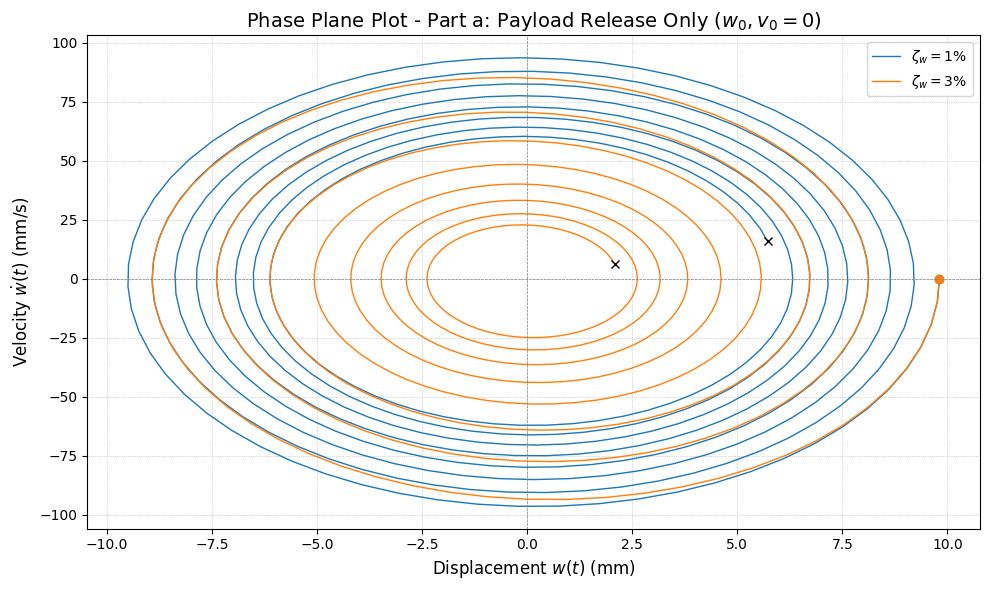

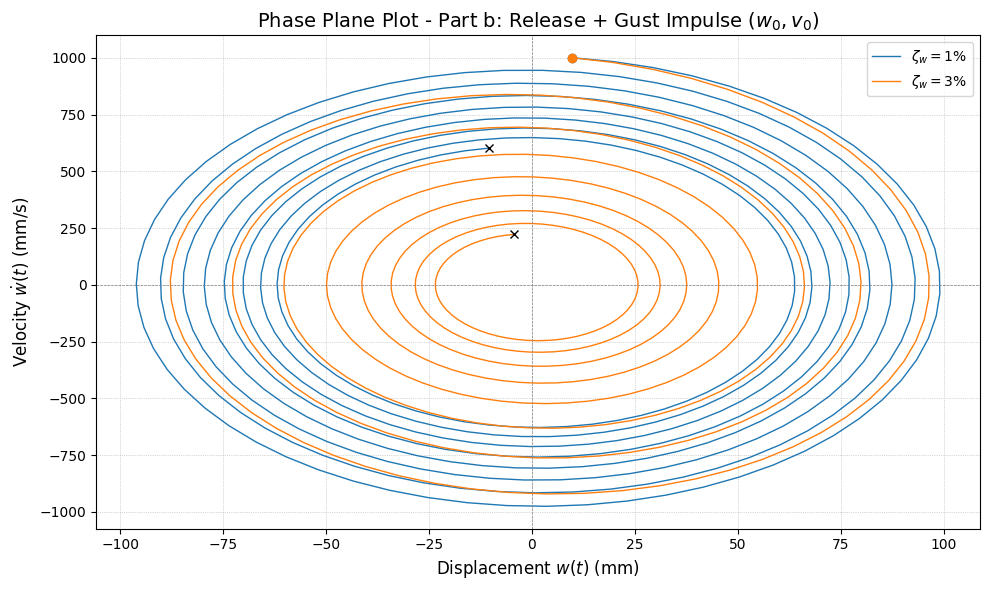

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================================================================
# 1. PARAMETER DEFINITIONS (Assumed numerical values for plotting)
# ==============================================================================
mw = 100.0  # Effective wing mass (kg)
mp = 10.0   # Payload mass (kg)
g = 9.81    # Gravity (m/s^2)
F_i = 100.0 # Impulse magnitude (N*s)
omega_n = 10.0 # Undamped natural frequency (rad/s)
k_w = mw * omega_n**2 # Stiffness (N/m)

# Initial conditions (constants for a given setup)
w0 = (mp * g) / k_w  # Initial displacement w(0) for both cases (m)
v0 = F_i / mw        # Initial velocity v(0) for case b (m/s)

# Damping ratios to analyze
zeta_values = [0.01, 0.03]

# Time vector for plotting
t = np.linspace(0, 5, 500) # 5 seconds, 500 points

# ==============================================================================
# 2. GENERALIZED RESPONSE FUNCTIONS
# ==============================================================================

# These functions calculate the displacement w(t) and velocity w_dot(t) 
# based on the free vibration solution:
# w(t) = exp(-zeta*omega_n*t) * [ A1 * cos(omega_d*t) + A2 * sin(omega_d*t) ]
# where A1 and A2 are determined by the initial conditions w(0) and w_dot(0).

def w_t(t, zeta, A1, A2):
    """Calculates the displacement w(t) in meters."""
    omega_d = omega_n * np.sqrt(1 - zeta**2)
    damping_term = np.exp(-zeta * omega_n * t)
    cosine_term = A1 * np.cos(omega_d * t)
    sine_term = A2 * np.sin(omega_d * t)
    return damping_term * (cosine_term + sine_term)

def dw_dt(t, zeta, A1, A2):
    """Calculates the velocity w_dot(t) in meters/second."""
    omega_d = omega_n * np.sqrt(1 - zeta**2)
    damping_term = np.exp(-zeta * omega_n * t)
    
    # Coefficients from the derivative of the w(t) solution
    cos_coeff = A2 * omega_d - A1 * zeta * omega_n
    sin_coeff = - (A1 * omega_d + A2 * zeta * omega_n)
    
    return damping_term * (cos_coeff * np.cos(omega_d * t) + sin_coeff * np.sin(omega_d * t))

# ==============================================================================
# 3. PHASE PLANE PLOT GENERATION FOR PART A
# (Initial Conditions: w(0) = w0, v(0) = 0)
# ==============================================================================

plt.figure(figsize=(10, 6))
plt.title('Phase Plane Plot - Part a: Payload Release Only ($w_0, v_0=0$)', fontsize=14)
plt.xlabel('Displacement $w(t)$ (mm)', fontsize=12)
plt.ylabel('Velocity $\dot{w}(t)$ (mm/s)', fontsize=12)

for zeta in zeta_values:
    omega_d = omega_n * np.sqrt(1 - zeta**2)
    
    # Calculate A1 and A2 for Part a: A1 = w(0), A2 = (v(0) + zeta*omega_n*A1) / omega_d
    A1_a = w0
    A2_a = (0.0 + zeta * omega_n * w0) / omega_d
    
    # Calculate response
    w_a_t = w_t(t, zeta, A1_a, A2_a)
    dw_a_dt = dw_dt(t, zeta, A1_a, A2_a)
    
    # Plotting: scale to mm and mm/s
    line, = plt.plot(w_a_t * 1000, dw_a_dt * 1000, label=f'$\\zeta_w = {zeta*100:.0f}\\%$', linewidth=1)
    
    # Mark start point (Initial condition)
    plt.plot(w_a_t[0] * 1000, dw_a_dt[0] * 1000, 'o', color=line.get_color(), markersize=6)
    # Mark end point (Convergence)
    plt.plot(w_a_t[-1] * 1000, dw_a_dt[-1] * 1000, 'x', color='black', markersize=6)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
# Note: The figure is saved internally as 'phase_plane_part_a.png'


# ==============================================================================
# 4. PHASE PLANE PLOT GENERATION FOR PART B
# (Initial Conditions: w(0) = w0, v(0) = v0)
# ==============================================================================

plt.figure(figsize=(10, 6))
plt.title('Phase Plane Plot - Part b: Release + Gust Impulse ($w_0, v_0$)', fontsize=14)
plt.xlabel('Displacement $w(t)$ (mm)', fontsize=12)
plt.ylabel('Velocity $\dot{w}(t)$ (mm/s)', fontsize=12)

for zeta in zeta_values:
    omega_d = omega_n * np.sqrt(1 - zeta**2)
    
    # Calculate A1 and A2 for Part b: A1 = w(0), A2 = (v(0) + zeta*omega_n*A1) / omega_d
    A1_b = w0
    A2_b = (v0 + zeta * omega_n * w0) / omega_d
    
    # Calculate response
    w_b_t = w_t(t, zeta, A1_b, A2_b)
    dw_b_dt = dw_dt(t, zeta, A1_b, A2_b)
    
    # Plotting: scale to mm and mm/s
    line, = plt.plot(w_b_t * 1000, dw_b_dt * 1000, label=f'$\\zeta_w = {zeta*100:.0f}\\%$', linewidth=1)
    
    # Mark start point (Initial condition)
    plt.plot(w_b_t[0] * 1000, dw_b_dt[0] * 1000, 'o', color=line.get_color(), markersize=6)
    # Mark end point (Convergence)
    plt.plot(w_b_t[-1] * 1000, dw_b_dt[-1] * 1000, 'x', color='black', markersize=6)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
# Note: The figure is saved internally as 'phase_plane_part_b.png'

<b> Approach 2.0: Equation of motion as an MDoF system</b> (7 points)
<br>
In this approach, you will not assume that the payload $m_p$ is a point mass. Accordingly, the contribution of $m_p$ radius of gyration, $\kappa$, to the dynamics must be considered. The center of $m_p$ is located at $e$ distance from elastic axis $X$. Assuming the wing experiences only vertical bending and twisting deformation and neglecting its mass, $m_w$, formulate the equations of motion using: 

<img src="Images/Approach2.png" alt="Alt text" width="400"/>

* a) Newtonian mechanics, and 
* b) Lagrange’s equations. Ignore damping for a and b.  

Complete the above tasks under this section. 

<b> Approach 3: Modal analysis of the wing as an MDoF system </b> (8 points)
<br>
In this approach the wing deflection is modeled as a segmented beam into %n% masses. . Considering only vertical bending of the wing, formulate the equations of motion for $n$=5. Assume $m_p$ is a point mass. 

* a) Estimate the mode shapes with and without $m_p$.
* b) Estimate the flextural natural frequencies with and without $m_p$.
* c) Compare your findings with Approach 01. 
